<center><h1>Data Cleaning</h1><center>

# Common data problems (`ride_sharing` DataFrame )

In [1]:
import pandas as pd 

In [2]:
ride_sharing = pd.read_csv('datasets/ride_sharing.csv', index_col=0)
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


The `user_type` column contains information on wheter a user is taking a free ride and takes on the following values.
* `1` for free riders.
* `2` for pay per ride.
* `3` for monthly subscribers.

### Changing `user_type`'s  type from `int64` to `category`

In [3]:
# Print the information of ride_sharing
print(ride_sharing.info()) #Note how user_type is in64 instead of categorical and how duration is type object (we want int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None


In [4]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe()) #These make no sense for categorical data

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [5]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')
# Write an assert statement confirming the change (no output means asserted)
assert ride_sharing['user_type_cat'].dtype == 'category'

In [6]:
# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


### Stripping `"minutes"` from `duration` and changing types from `object` to `int`

In [7]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

In [8]:
# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

In [9]:
# Print formed columns and calculate average ride duration 
display(ride_sharing[['duration','duration_trim', 'duration_time']])
print('Column types. duration: ', ride_sharing.duration.dtype,
      'duration_trim:',ride_sharing.duration_trim.dtype,
      'duration_time:',ride_sharing.duration_time.dtype)
print('Average ride duration:', ride_sharing.duration_time.mean())

,duration,duration_trim,duration_time
0,12 minutes,12,12
1,24 minutes,24,24
2,8 minutes,8,8
3,4 minutes,4,4
4,11 minutes,11,11
...,...,...,...
25755,11 minutes,11,11
25756,10 minutes,10,10
25757,14 minutes,14,14
25758,14 minutes,14,14


Column types. duration:  object duration_trim: object duration_time: int32
Average ride duration: 11.389052795031056


### Data range constraints: `tire_size` and `ride_date`
```python
# Convert tire_sizes to integer (to be able to perform filtering in the next line)
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description. Note how the max tire_sizes value is now 27
print(ride_sharing['tire_sizes'].describe())
```
    count     25760
    unique        2
    top          27
    freq      13274
    Name: tire_sizes, dtype: int64

```python
import datetime as dt
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())
```
    2020-07-06 00:00:00

### Finding duplicates.

```python
# Find duplicates
duplicates = ride_sharing.duplicated(subset=['ride_id'], keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by='ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])
```
            ride_id  duration  user_birth_year
    22       33        10             1979
    39       33         2             1979
    53       55         9             1985
    65       55         9             1985
    74       71        11             1997
    75       71        11             1997
    76       89         9             1986
    77       89         9             2060

### Treating duplicates

```python
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()
print(ride_unique)
```
        ride_id  user_birth_year  duration
    0         0             1988        11
    1         1             1988         8
    2         2             1988        11
    3         3             1969         7
    4         4             1986        11
    ..      ...              ...       ...
    69       94             1993        25
    70       95             1959        11
    71       96             1991         7
    72       98             1989        21
    73       99             1968        15

    [74 rows x 3 columns]

```python
#Find duplicated values again
duplicates = ride_unique.duplicated(subset=['ride_id'], keep=False)
duplicated_rides = ride_unique[duplicates==True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0
```

# Text and categorical data problems (`airlines` DataFrame)

In [10]:
import pandas as pd
import numpy as np

### Finding consistency (category membership constraints)

In [11]:
airlines = pd.read_csv('datasets/airlines.csv', index_col=0)
categories = pd.read_csv('datasets/categories.csv')
display(airlines.head())
display(categories)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [12]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n") #notice the 'unacceptable' value
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Unacceptable'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [13]:
#Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
print(cat_clean)

{'Unacceptable'}


In [14]:
#Find rows with that category:
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

#Print rows with inconsistent category (notice 'Unacceptable')
display(airlines[cat_clean_rows])

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
64,3212,Thursday,AMERICAN,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,90.0,Unacceptable,Somewhat safe,Somewhat unsatisfied
134,2281,Wednesday,QANTAS,SYDNEY,Australia/New Zealand,Hub,Gates 1-12,2018-12-31,225.0,Unacceptable,Neutral,Somewhat unsatisfied
154,2482,Friday,ALASKA,SALT LAKE CITY,West US,Medium,Gates 1-12,2018-12-31,90.0,Unacceptable,Neutral,Somewhat unsatisfied
2464,3209,Tuesday,UNITED,SANTA BARBARA,West US,Small,Gates 70-90,2018-12-31,35.0,Unacceptable,Somewhat safe,Very unsatisfied


In [15]:
# Print rows with consistent categories only

"""display(airlines[~cat_clean_rows])""" #drops the inconsistent rows


'display(airlines[~cat_clean_rows])'

### Inconsistent categories (capitalization/abbreviations/ leading and trailing whitespaces) (`EAST US`, `East US` / `Europe`, `eur`)

In [16]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [17]:
#Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'Europe'})

#Remove white spaces from 'dest_size'
airlines['dest_size'] = airlines['dest_size'].str.strip() #strip() without input strips all leading and trailing whitespaces

#Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'Europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories
The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

* `wait_type`: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
* `day_week`: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.

In [18]:
#Create ranges for categories
ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

#Create wait_type column
airlines['wait_type'] = pd.cut(airlines.wait_min, bins=ranges, labels=label_names)

#Creating mappings and replace
mappings = {'Monday': 'weekday', 'Tuesday': 'weekday', 'Wednesday': 'weekday',
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}
airlines['day_week'] = airlines['day'].replace(mappings)

airlines[['id','day', 'wait_min', 'wait_type', 'day_week']].head()

,id,day,wait_min,wait_type,day_week
0,1351,Tuesday,115.0,medium,weekday
1,373,Friday,135.0,medium,weekday
2,2820,Thursday,70.0,medium,weekday
3,1157,Tuesday,190.0,long,weekday
4,2992,Wednesday,559.0,long,weekday


### Cleaning text data. (Removing titles and taking names / keeping long descriptions only)

In [19]:
airlines = pd.read_csv('datasets/airlines_new.csv', index_col=0)

While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as `"Dr."`, `"Mr."`, `"Ms."` and `"Miss"`.

In [20]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.", "")
# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")
# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")
# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

#Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In this exercise, you will isolate the responses (stored in the `survey_response` column) with a character count higher than ***40*** , and make sure your new DataFrame contains responses with ***40*** characters or more using an assert statement.

In [21]:
airlines = pd.read_csv('datasets/airlines_questions.csv')

In [22]:
# Store length of each row in survey_response column
resp_lenght = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_lenght > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response']) #every survey_response here has lenght > 40

17    The airport personnell forgot to alert us of d...
18    The food in the airport was really really expe...
19    One of the other travelers was really loud and...
20    I don't remember answering the survey with the...
21    The airport personnel kept ignoring my request...
22    The chair I sat in was extremely uncomfortable...
23    I wish you were more like other airports, the ...
24    I was really unsatisfied with the wait times b...
25    The flight was okay, but I didn't really like ...
26    We were really slowed down by security measure...
27    There was a spill on the aisle next to the bat...
28    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


# Advanced Data Problems (`banking` DataFrame)

In [23]:
import pandas as pd
banking = pd.read_csv('datasets/banking_1.csv', index_col=0)
banking.head() #Notice non-uniform dates for account_opened

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,dollar,35500.50,03-05-18,30-09-19
1,D5536652,86506.85,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.33,dollar,46412.27,"January 26, 2018",06-10-19
3,93F2F951,93875.24,euro,76563.35,21-14-17,10-07-19
4,DE0A0882,99998.35,euro,18669.01,05-06-17,15-01-19


### Uniform currencies (converting `acc_amount` to dollar values and replacing `'euro'` strings in `acct_cur`)

In [24]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu,'acct_amount'] = banking.loc[acct_eu,'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Print unique values of acct_cur
assert banking['acct_cur'].unique() == 'dollar'

display(banking.head())

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.710,dollar,35500.50,03-05-18,30-09-19
1,D5536652,86506.850,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.330,dollar,46412.27,"January 26, 2018",06-10-19
3,93F2F951,103262.764,dollar,76563.35,21-14-17,10-07-19
4,DE0A0882,109998.185,dollar,18669.01,05-06-17,15-01-19


### Uniform dates

In [25]:
# Print the header of account_opened
print(banking.account_opened.head())

0            03-05-18
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object


In [26]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print account_opened and acct_year
banking[['account_opened','acct_year']].head() #NaT pandas' Not a Time

,account_opened,acct_year
0,2018-03-05,2018
1,2018-01-21,2018
2,2018-01-26,2018
3,NaT,NaN
4,2017-05-06,2017


### Cross field validation. Cheking if  different funds `A`, `B` and `C` add up to total `inv_amount`. Cheking if  `Age`s corresponds to `birth_date`s 

In [27]:
banking = pd.read_csv('datasets/banking_dirty.csv', index_col=0)
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [28]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Print inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [29]:
import datetime as dt

banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Print inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  8


### Completeness (missing `investors` & `cust_id`s)

In [30]:
import matplotlib.pyplot as plt
import missingno as msno
banking = pd.read_csv('datasets/banking_missing.csv', index_col=0)

# Print number of missing values in banking
print(banking.isna().sum())

cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


#### Missing investors

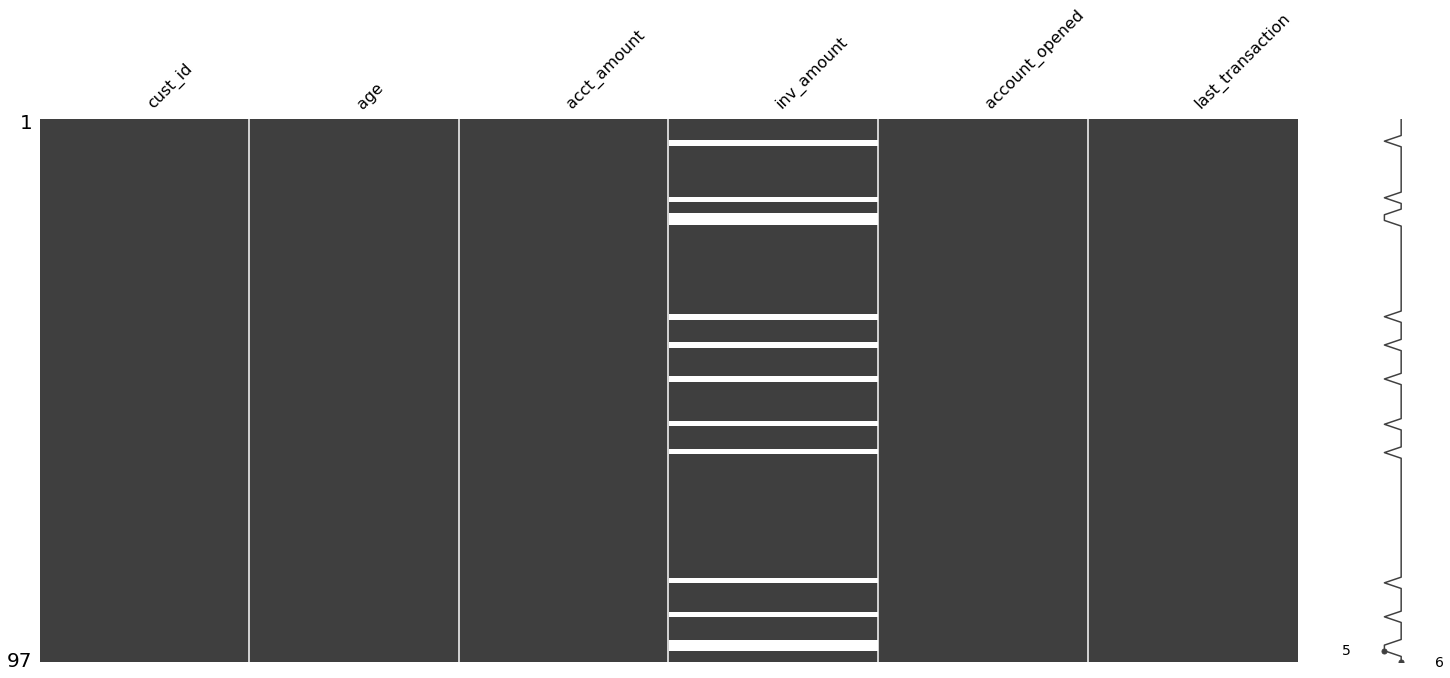

In [31]:
# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [32]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]


#Structural differences between investors and non-investors
print("Missing investors:")
print(missing_investors.describe())
print("Investors:")
print(investors.describe())

Missing investors:
             age   acct_amount  inv_amount
count  13.000000     13.000000         0.0
mean   21.846154  73231.238462         NaN
std     1.519109  25553.327176         NaN
min    20.000000  21942.370000         NaN
25%    21.000000  66947.300000         NaN
50%    21.000000  86028.480000         NaN
75%    23.000000  89855.980000         NaN
max    25.000000  99998.350000         NaN
Investors:
             age    acct_amount    inv_amount
count  84.000000      84.000000     84.000000
mean   43.559524   75095.273214  44717.885476
std    10.411244   32414.506022  26031.246094
min    26.000000   12209.840000   3216.720000
25%    34.000000   57373.062500  22736.037500
50%    45.000000   83061.845000  44498.460000
75%    53.000000   94165.965000  66176.802500
max    59.000000  250046.760000  93552.690000


Notice how the `inv_amount` is missing only for young customers, since the average age in `missing_investors` is 22 and the maximum age is 25.

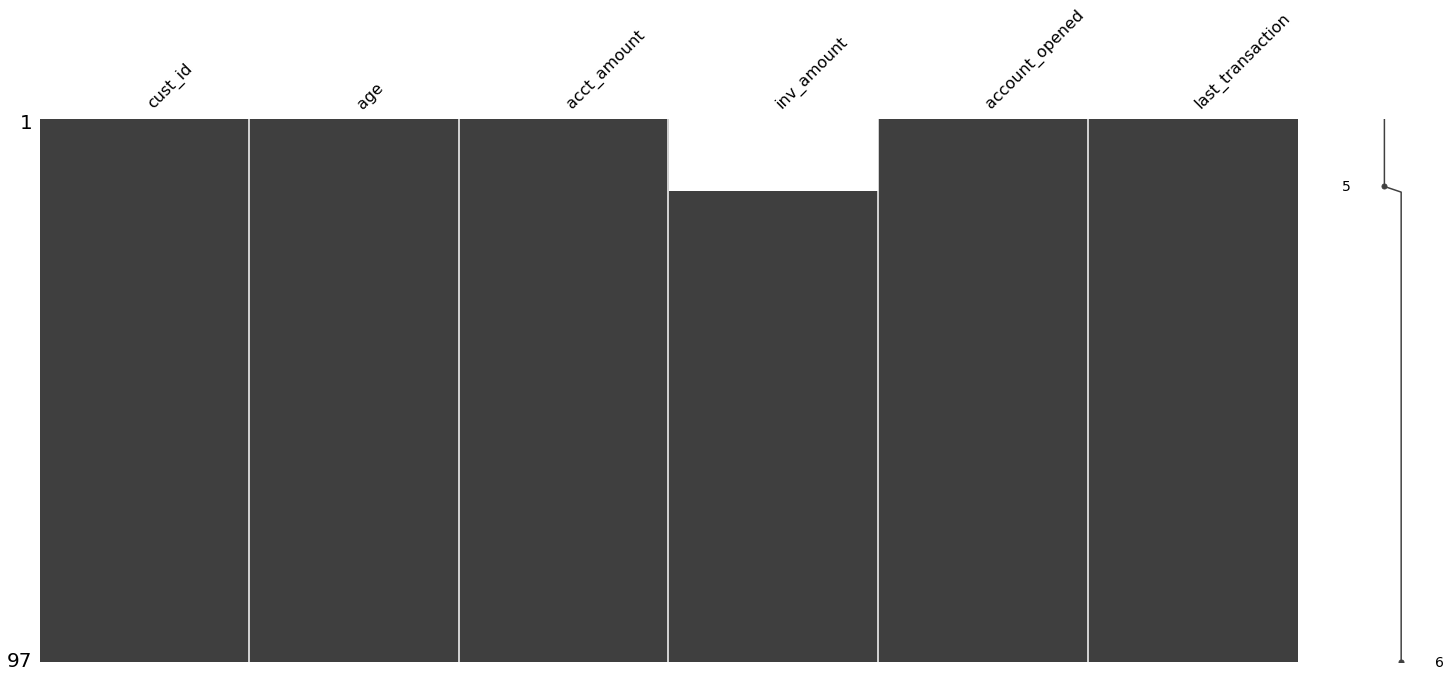

In [33]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

Notice how all the white spaces for `inv_amount` are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to `0` with `.fillna()`.

#### Drop rows with missing `cust_ids`, and impute missing values of `acct_amount`

In [34]:
banking = pd.read_csv('datasets/banking_dirty2.csv', index_col=0)

# Print number of missing values in banking
print(banking.isna().sum())

cust_id              9
acct_amount         14
inv_amount           0
account_opened       0
last_transaction     0
dtype: int64


In [35]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset=['cust_id'])

# Compute estimated acct_amount
# We knew beforehand that the total acct_amount is approx 5 times the inv_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum()) #No missing data left. BAM

cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64
